<a href="https://colab.research.google.com/github/cbrumm/deep-learning-with-python-book/blob/main/Chapter_4_reuters_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from tensorflow.keras.datasets import reuters
number_of_words = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=number_of_words)
#print(len(train_data), len(test_data))
#print(train_data[10])
#print(train_labels[10])

In [86]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?')
  for i in train_data[0]])
#print(decoded_newswire)

In [87]:
# Vectorize the data. Note that the prepresentation is sparse, so somewhat inefficient.

import numpy as np

# tensorflow.keras.utils.to_categorical does the same.
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data, dimension=number_of_words)
x_test = vectorize_sequences(test_data, dimension=number_of_words)

y_train = vectorize_sequences(train_labels, dimension=46)
y_test = vectorize_sequences(test_labels, dimension=46)

#print(x_train.shape, x_test.shape)
#print(y_train.shape, y_test.shape)


In [88]:
import keras

# softmax will produce a probability distribution over the outputs
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
val_size = 1000

x_val = x_train[:val_size]
partial_x_train = x_train[val_size:]

y_val = y_train[:val_size]
partial_y_train = y_train[val_size:]

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=15,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/15
16/16 [==============================] - 1s 55ms/step - loss: 3.1957 - accuracy: 0.4390 - val_loss: 2.5882 - val_accuracy: 0.6180
Epoch 2/15
16/16 [==============================] - 1s 35ms/step - loss: 2.2143 - accuracy: 0.6564 - val_loss: 1.9312 - val_accuracy: 0.6650
Epoch 3/15
16/16 [==============================] - 1s 35ms/step - loss: 1.6660 - accuracy: 0.6992 - val_loss: 1.5588 - val_accuracy: 0.7020
Epoch 4/15
16/16 [==============================] - 1s 35ms/step - loss: 1.3412 - accuracy: 0.7423 - val_loss: 1.3463 - val_accuracy: 0.7300
Epoch 5/15
16/16 [==============================] - 1s 37ms/step - loss: 1.1288 - accuracy: 0.7746 - val_loss: 1.2073 - val_accuracy: 0.7480
Epoch 6/15
16/16 [==============================] - 1s 53ms/step - loss: 0.9748 - accuracy: 0.8031 - val_loss: 1.1138 - val_accuracy: 0.7560
Epoch 7/15
16/16 [==============================] - 1s 57ms/step - loss: 0.8585 - accuracy: 0.8261 - val_loss: 1.0460 - val_accuracy: 0.7770
Epoch 8/15
16

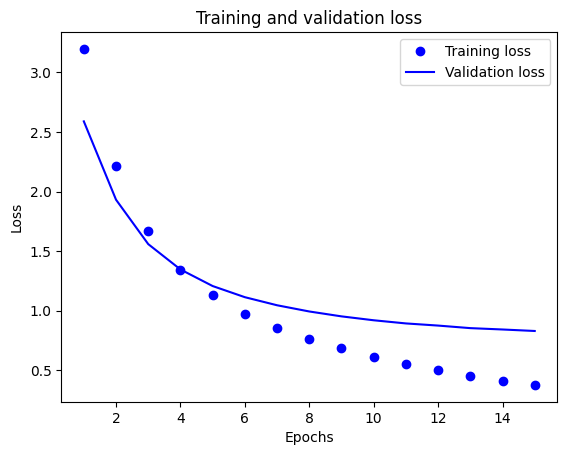

In [90]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

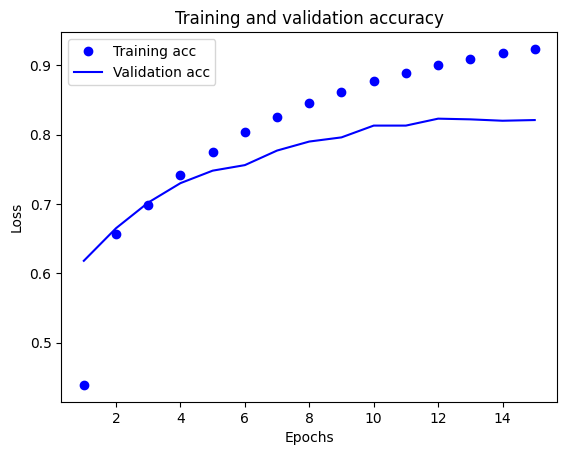

In [91]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
# How good does a random classifier do?
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19545859305431879

In [93]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(np.sum(predictions[0]))
print(predictions[0][np.argmax(predictions[0])])

71/71 [==============================] - 0s 3ms/step
[5.51605335e-05 1.94427834e-04 2.11019524e-05 9.04735863e-01
 8.09098557e-02 8.46258336e-05 9.99344629e-05 1.39394862e-04
 1.58910523e-03 1.61534583e-04 1.03880724e-04 1.07357325e-03
 1.45180704e-04 3.37531121e-04 4.06921288e-04 2.87695584e-04
 2.04816414e-03 4.91071376e-04 9.02622633e-05 1.08114921e-03
 2.39585876e-03 5.03590796e-04 2.45855408e-05 2.58842949e-04
 1.47508035e-04 1.41796772e-04 1.04490136e-05 3.40733750e-05
 2.37286979e-04 1.99272559e-04 1.80386924e-04 2.48037482e-04
 2.67001975e-04 8.07965989e-05 3.60351085e-04 2.84117887e-05
 9.60085672e-05 1.16341442e-04 8.13472507e-05 1.62864089e-04
 2.93139838e-05 9.80316545e-05 1.41285645e-05 6.75413175e-05
 1.01431178e-04 5.83096626e-05]
3
1.0000001
0.90473586
